<a href="https://colab.research.google.com/github/GiovanaThais/listasPython/blob/master/Copy_ME_PROCESSAMENTO_DE_IMAGENS_DE_COMPUTA%C3%87%C3%83O_GR%C3%81FICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UNIT - Curso de Computação**

**Processamento de Imagens de Computação Gráfica**

Profª. Layse Santos Souza

# **Medida de Eficiência - Unidade I**



***Observações***

1. Não será permitido o empréstimo de materiais, conversas paralelas ou consultas a materiais durante a
realização da Medida de Eficiência, de tal modo que será atribuída a nota zero aos alunos.

2. As soluções das questões deverão ser resolvidas dentro deste notebook e postadas no espaço destinado à atividade **ME - Unidade I** no *Google Classroom* da disciplina Processamento de Imagens de Computação Gráfica até o dia 03/04/2022.

3. Todos os métodos necessários estão dispostos nesta página. 

4. As imagens necessárias estão disponíveis na atividade ***ME - Unidade I*** do Google Classroom.

5. O arquivo anexado forá do prazo será desconsiderado, de tal modo que será atribuída a nota zero aos alunos.

6. É de inteira responsabilidade do aluno a postagem do arquivo para correção. O mesmo ficará registrado no espaço destinado à atividade **ME – Unidade I** do professor para posterior verificação.

7. A solução que não possa ser executada (sem compilar) será desconsiderada durante a correção.

8. Bom desempenho.

## **Métodos Auxiliares**

In [5]:
# Importando as bibliotecas e pacotes necessários
import random
import scipy.misc
import numpy as np
import cv2 as cv
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage import io
from skimage import data
from skimage.transform import resize
from skimage.color import rgb2gray, rgb2gray
from skimage.color import convert_colorspace
from skimage.filters import threshold_otsu

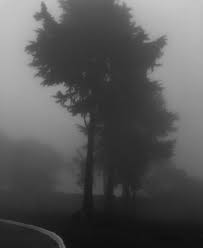

In [ ]:
# Converte a imagem para melhorar o RGB
imagemRGB = cv.cvtColor(imagem, cv.COLOR_BGR2RGB)
cv2_imshow(imagemRGB)

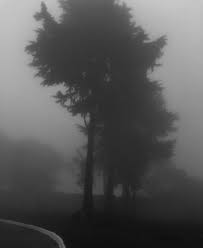

In [ ]:
# Converter a imagem para a escala de cinza
imagemCinza = cv.cvtColor(imagem, cv.COLOR_BGR2GRAY)
cv2_imshow(imagemCinza)

In [ ]:
def transformacao_linear(imagem, g_min, g_max):
  f_min = min(imagem.flatten())
  f_max = max(imagem.flatten())

  a = (g_max - g_min) / (f_max - f_min)
  b = g_min

  imagem = imagem - f_min

  novaImagem = (a * imagem) + b

  return np.uint8(novaImagem)

In [ ]:
# Resolução espacial - vizinhança 4
def vizinhanca4(linha, coluna):
    v1 = (linha - 1, coluna)
    v2 = (linha, coluna - 1)
    v3 = (linha + 1, coluna)
    v4 = (linha, coluna + 1)
    return [v1, v2, v3, v4]

In [ ]:
# Resolução espacial - vizinhança 8
def vizinhanca8(linha, coluna):
    v5 = (linha - 1, coluna - 1)
    v6 = (linha - 1, coluna + 1)
    v7 = (linha + 1, coluna - 1)
    v8 = (linha + 1, coluna + 1)
    
    vizinhanca = vizinhanca4(linha, coluna) + [v5, v6, v7, v8]
    return vizinhanca

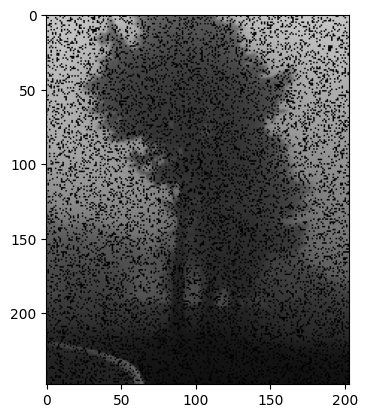

In [ ]:
# Cria ruído 
temp_image = np.asarray(imagem)

tamanho_imagem = imagem.shape

M = tamanho_imagem[0]
N = tamanho_imagem[1]

new_image = np.zeros((M, N),dtype='uint8')

for i in range(0, M):
    
    randomvalues = random.sample(range(0, N), 40)
    
    for value in randomvalues:
        
        temp_image[i, value] = 0


plt.imshow(temp_image, cmap="gray")
plt.show()

In [ ]:
# Correlação
def correlacao(img, img_corr, mascara):

  img_correlacao = np.zeros(np.array(img.shape) + np.array(mascara.shape) - 1)

  for x in range(mascara.shape[0]):
    for y in range(mascara.shape[1]):

      img_correlacao[x:x+img.shape[0], y:y+img.shape[1]] += img * mascara[x,y]

      return img_correlacao.astype('uint8')


In [ ]:
# Convolução
def rotate_180(image):
    size_image = image.shape

    M = size_image[0]
    N = size_image[1]

    new_image = np.zeros((M, N))

    for i in range(0, M):
        for j in range(0, N):
            new_image[(M-1)-i, (N-1)-j] = image[i, j]

    return new_image


def get_slice(point, size, image): # point: ponto que será aplicado a máscara, size: tamanho da mascara (3 para 3x3, 5 para 5x5), image: imagem original
    
    delta = int(size/2)
    
    a = (point[0] - delta)
    b = (point[1] - delta)

    return image[a:(a+size), b:(b+size)]

def convolucao(image, mask):
    
    size_image = image.shape
    
    M = size_image[0]
    N = size_image[1]
    
    size_mask = mask.shape
    
    m = size_mask[0]
    n = size_mask[1]
    
    new_image = np.zeros(image.shape)
    
    delta = int(m/2)
    
    for i in range(0+delta, image.shape[0]-delta):
        for j in range(0+delta, image.shape[1]-delta):
            
            slice_image = get_slice((i, j), m, image)
            
            mask_180 = rotate_180(mask)
            
            new_i_j = np.sum(slice_image * mask_180)
            
            new_image[i, j] = new_i_j
            
    return new_image


In [ ]:
# Retornar o histograma de uma imagem
def get_histogram(imagem, limite_cinza):
    #transformacao_linear(imagem, 0, limite_cinza-1)
    array = imagem.flatten()
    hist = np.zeros(limite_cinza,dtype='int')
    for i in range(0, len(array)):
        hist[array[i]] +=1
    return hist  

In [ ]:
# Retornar o histograma de uma imagem colorida
color = ('b','g','r')

plt.title("Histograma RGB")

for channel,col in enumerate(color): # channel -> canais da imagem colorida
    histr = cv.calcHist([imagem],[channel],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [ ]:
# Equalização do histograma de uma imagem
imagem = cv.cvtColor(imagem, cv.COLOR_BGR2GRAY) 
histogramaEqualizado = cv.equalizeHist(imagem)

In [ ]:
# Criação dos filtros
h1 = 1/9 * np.ones((3,3), dtype='int')
h2 = 1/25 * np.ones((5,5), dtype='int')
h3 = 1/49 * np.ones((7,7), dtype='int')
h4 = 1/225 * np.ones((15, 15), dtype='int')
h5 = 1*10 * np.array([[1, 1, 1],[1, 2, 1],[1, 1, 1]])
h6 = 1/16 * np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]]) 

In [ ]:
# Imangem negativa
def imagemNegativa(imagem):
  imgagem = -1 * imagem + 255
  return imagem

In [ ]:
# Transformação linear
def transformacao_linear(imagem, g_min, g_max):
    
    f_min = min(imagem.flatten())
    f_max = max(imagem.flatten())
    
    a = (g_max - g_min) / (f_max - f_min)
    b = g_min
    
    imagem = imagem - f_min
    
    novaImagem = (a*imagem) + b
    
    return np.uint8(novaImagem)

In [ ]:
# Transformação não-linear: logarítmica
c = 255 / (np.log(1 + np.max(imagem)))
imagemNLL = c * np.log(1 + imagem)

In [ ]:
# Transformação não-linear: exponencial
imagemNLE = cv.normalize(imagem.astype('double'), None, 0.0, 1.0, cv.NORM_MINMAX)

In [ ]:
# Filtros passa-baixa
new_image = cv.blur(imagem, (figure_size, figure_size)) 
new_image = cv.medianBlur(imagem, figure_size) 

In [ ]:
# Filtro passa-alta
sobelx = cv.Sobel(imagem,cv.CV_64F,1,0)  
sobely = cv.Sobel(imagem,cv.CV_64F,0,1)  
sobelxy = cv.Sobel(imagem,cv.CV_64F,1,1)

In [ ]:
# exibir o histograma - forma 1

histograma = get_histogram(imagem, 256)

x = range(len(histograma))
y = histograma

plt.plot(x, y)


# exibir o histograma - forma 2

plt.figure() 
plt.hist(histogramaEqualizado.ravel(), 256, [0,256]) 
plt.xlim([0, 256]) 
plt.show()


# exibir um histograma ao lado do outro

plt.clf()
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(x_imagem, y_imagem)

plt.subplot(122)
plt.plot(x_imagem, y_imagem)

# exibir uma imagem ao lado da outra

plt.figure(figsize=(11,6))
plt.subplot(121)
plt.imshow(imagem)
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(imagem)
plt.xticks([])
plt.yticks([])

plt.show()

## **Questões**

### **Questão 1 (0,5)**

Conforme os conceitos de realce de imagens e transformação da escala de cinza, e a imagem disponibilizada (img01) aplique as funções imagemNegativa() e transformacao_linear(), e em seguida, gere o histograma da imagem, e em seguida, equalize o histograma da imagem.



*Imagem*

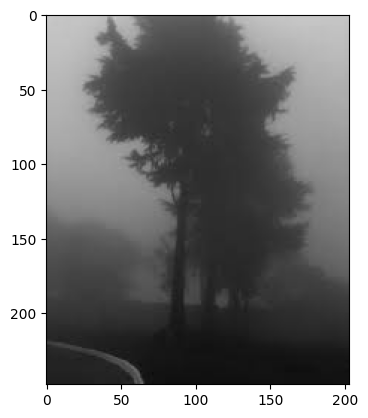

In [6]:
img01 = cv.imread('/content/img01.jpeg')
plt.imshow(img01)

**Respostas**

In [8]:
#aplicando transformação linear
def transformacao_linear(imagem, g_min, g_max): 
  f_min = min(imagem.flatten())
  f_max = max(imagem.flatten())

  a = (g_max - g_min) / (f_max - f_min)
  b = g_min

  imagem = imagem - f_min

  novaImagem = (a * imagem) + b

  return np.uint8(novaImagem)

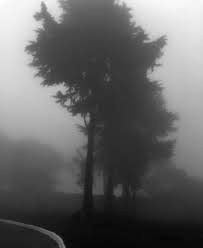

In [9]:
nova_imagem = transformacao_linear(img01, 0, 255)
cv2_imshow(nova_imagem)

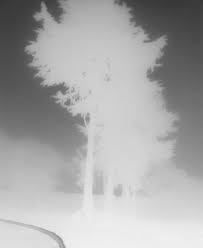

In [10]:
#Imagem negativa
def imagemNegativa(imagem):
  imagem = -1 * imagem + 255
  return imagem

imagemneg = imagemNegativa(img01)
cv2_imshow(imagemneg)

In [ ]:
#gerando histograma

In [11]:
def get_histogram(imagem, limite_cinza):
  array = imagem.flatten()
  hist = np.zeros(limite_cinza, dtype='int')
  for i in range(0, len(array)):
    hist[array[i]] += 1
  return hist

<Figure size 640x480 with 0 Axes>

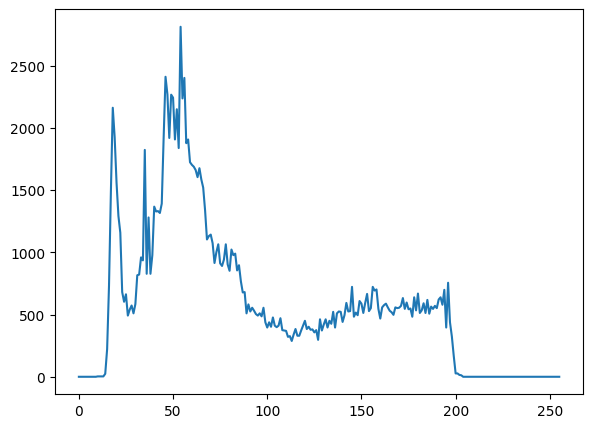

In [ ]:
histograma_contraste = get_histogram(imagemneg, 256)
x_contraste = range(len(histograma_contraste))
y_contraste = histograma_contraste

plt.clf()
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(x_contraste, y_contraste)

In [ ]:
#equalizando o histograma da imagem 
img = cv.imread('/content/img01.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

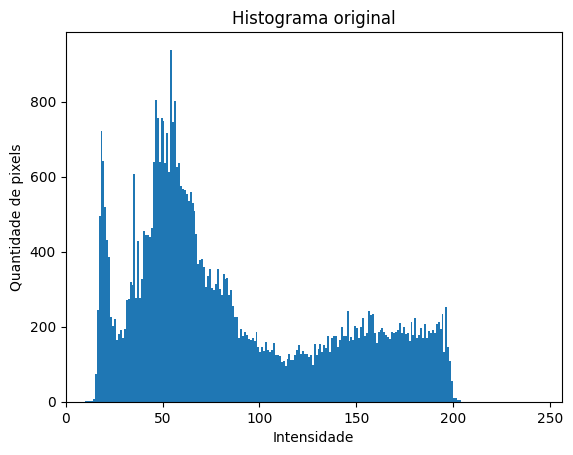

In [ ]:
plt.figure()
plt.title('Histograma original')
plt.xlabel('Intensidade')
plt.ylabel('Quantidade de pixels')
plt.hist(img.ravel(), 256, [0,256])
plt.xlim([0,256])
plt.show()

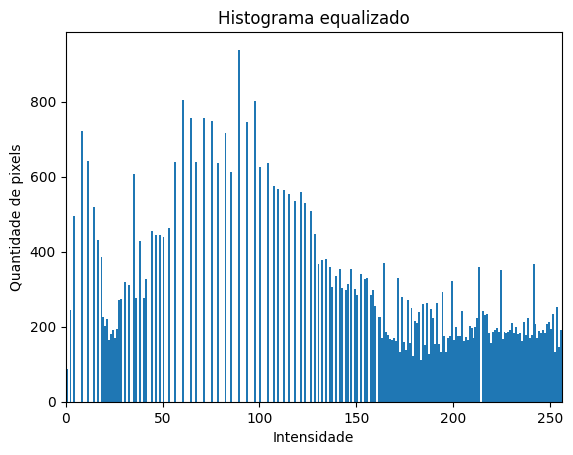

In [ ]:
h_eq = cv.equalizeHist(img)

plt.title('Histograma equalizado')
plt.xlabel('Intensidade')
plt.ylabel('Quantidade de pixels')
plt.hist(h_eq.ravel(), 256, [0,256])
plt.xlim([0,256])
plt.show()

### **Questão 2 (0,5)**

Conforme os conceitos de filtragem e a imagem disponibilizada (img02), aplique um método que remova o ruído da imagem. Deve-se obter uma imagem o mais próximo possível da imagem gabarito.Em seguida, teste mais de uma técnica. 

*Imagem Gabarito*

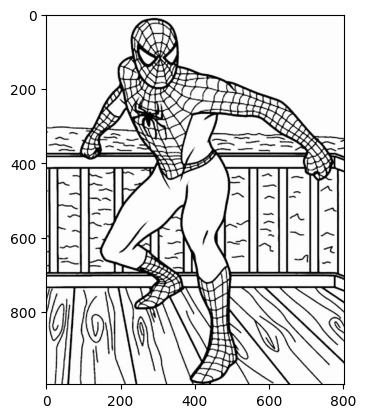

In [13]:
img02 = cv.imread("/content/img2.jpg")
plt.imshow(img02)

In [14]:
median2 = cv.medianBlur(img02, 5)

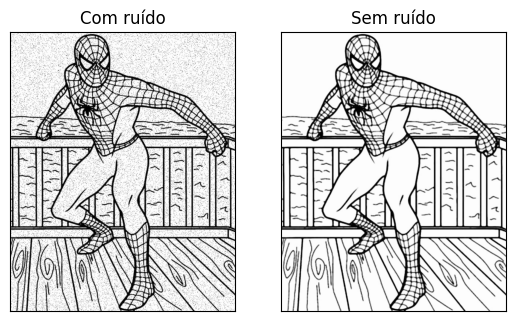

In [16]:
plt.subplot(121), plt.imshow(img02), plt.title('Com ruído')
plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(median2), plt.title('Sem ruído')
plt.xticks([]), plt.yticks([])

plt.show()

*Imagem com ruído*

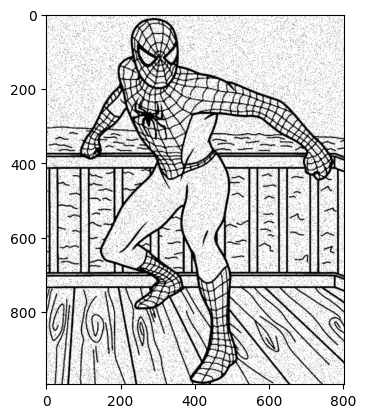

In [15]:
temp_image = np.asarray(img02)

tamanho_imagem = img02.shape

M = tamanho_imagem[0]
N = tamanho_imagem[1]

new_image = np.zeros((M, N),dtype='uint8')

for i in range(0, M):
    
    randomvalues = random.sample(range(0, N), 40)
    
    for value in randomvalues:
        
        temp_image[i, value] = 0


plt.imshow(temp_image, cmap="gray")
plt.show()

**Respostas**

Removendo ruído com passa baixa

In [17]:
# Criação dos filtros
h1 = 1/9 * np.ones((3,3), dtype='int')
h2 = 1/25 * np.ones((5,5), dtype='int')
h3 = 1/49 * np.ones((7,7), dtype='int')
h4 = 1/225 * np.ones((15, 15), dtype='int')
h5 = 1*10 * np.array([[1, 1, 1],[1, 2, 1],[1, 1, 1]])
h6 = 1/16 * np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]]) 

In [ ]:
h1 = 1/9 * np.ones((3,3), dtype='int')
h2 = 1/25 * np.ones((5,5), dtype='int')
h3 = 1/225 * np.ones((15,15), dtype='int')

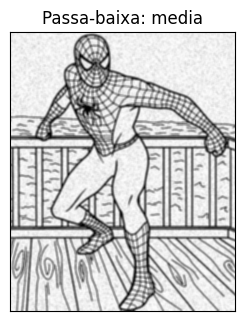

In [23]:
figure_size = 9
new_image = cv.blur(temp_image, (figure_size, figure_size))

plt.subplot(121)
plt.imshow(new_image)
plt.xticks([])
plt.yticks([])
plt.title('Passa-baixa: media')

plt.show()

Text(0.5, 1.0, 'Passa-baixa: media ponderada')

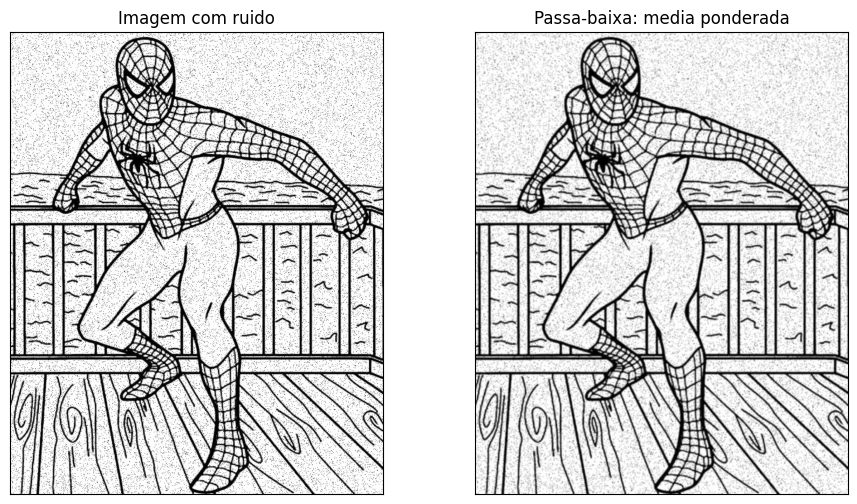

In [27]:
# Aplica o filtro de passa-baixa : média ponderada

img01_mediap_filtered = cv.filter2D(temp_image, -1, h1)

plt.figure(figsize=(11,6))
plt.subplot(121)
plt.imshow(temp_image)
plt.title('Imagem com ruido')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(img01_mediap_filtered)
plt.xticks([])
plt.yticks([])
plt.title('Passa-baixa: media ponderada')

In [28]:
# Aplica o filtro de passa-baixa : moda

kernel = np.ones((3, 3), np.float32) / 9

# Definir o tamanho da janela do filtro de moda
window_size = 5

# Aplicar o filtro de moda na imagem
img01_moda_filtered = ndimage.generic_filter(img01, np.nanmedian, size=window_size)

NameError: ignored

### **Questão 3 (1,0)**

Equalize o histograma da imagem abaixo na escala de cinza demonstrando os passos necessários para a sua realização. 

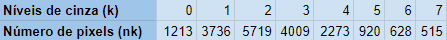

**Respostas**

In [ ]:
#passo da soma de pixels
x = 1213 + 3736 + 5719 + 4009 + 2273 + 920 + 628 + 515
print(x)

19013


In [ ]:
#passo da probabilidade
p0 = 1213 / 19013 
print('p0 -> %.2f' % p0)

p1 = 3736 / 19013
print('p1 -> %.2f' % p1)

p2 = 5719 / 19013
print('p2 -> %.2f' % p2)

p3 = 4009 / 19013
print('p3 -> %.2f' % p3)

p4 = 2273 / 19013
print('p4 -> %.2f' % p4)

p5 = 920 / 19013
print('p5 -> %.2f' % p5)

p6 = 628 / 19013
print('p6 -> %.2f' % p6)

p7 = 515 / 19013
print('p7 -> %.2f' % p7)

p0 -> 0.06
p1 -> 0.20
p2 -> 0.30
p3 -> 0.21
p4 -> 0.12
p5 -> 0.05
p6 -> 0.03
p7 -> 0.03


In [ ]:
#passo da distribuição acumulada de probabilidade
g0 = 0.06 
print('g0 -> %.2f' % g0)

g1 = 0.06 + 0.20
print('g1 -> %.2f' % g1)

g2 = 0.06 + 0.20 + 0.30
print('g2 -> %.2f' % g2)

g3 = 0.06 + 0.20 + 0.30 + 0.21
print('g3 -> %.2f' % g3)

g4 = 0.06 + 0.20 + 0.30 + 0.21 + 0.12
print('g4 -> %.2f' % g4)

g5 = 0.06 + 0.20 + 0.30 + 0.21 + 0.12 + 0.05
print('g5 -> %.2f' % g5)

g6 = 0.06 + 0.20 + 0.30 + 0.21 + 0.12 + 0.05 + 0.03
print('g6 -> %.2f' % g6)

g7 = 0.06 + 0.20 + 0.30 + 0.21 + 0.12 + 0.05 + 0.03 + 0.03
print('g7 -> %.2f' % g7)

g0 -> 0.06
g1 -> 0.26
g2 -> 0.56
g3 -> 0.77
g4 -> 0.89
g5 -> 0.94
g6 -> 0.97
g7 -> 1.00


In [ ]:
g0 = 0.06 * 7 #calculando normalizador
print('g0 -> %.2f' % g0)

g1 = 0.26 * 7
print('g1 -> %.2f' % g1)

g2 = 0.56 * 7
print('g2 -> %.2f' % g2)

g3 = 0.77 * 7
print('g3 -> %.2f' % g3)

g4 = 0.89 * 7
print('g4 -> %.2f' % g4)

g5 = 0.94 * 7
print('g5 -> %.2f' % g5)

g6 = 0.97 * 7
print('g6 -> %.2f' % g6)

g7 = 1.00 * 7
print('g7 -> %.2f' % g7)

g0 -> 0.42
g1 -> 1.82
g2 -> 3.92
g3 -> 5.39
g4 -> 6.23
g5 -> 6.58
g6 -> 6.79
g7 -> 7.00


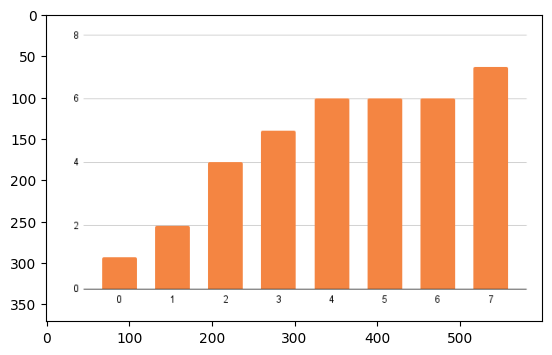

In [ ]:
img02 = cv.imread("/content/chart.png")
plt.imshow(img02)